# Telecom Churn - ML Group Case Study

#### Institute: IIIT,Bangalore & upGrad
#### Course: PG Diploma in ML & AI (Batch: C 12)
#### Submission Date: 13-APR-2020
#### Submitted By:
#####    1. Prannoy Prashad
#####    2. Anjali Sharma
    

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Data Understanding

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Reading the csv file
churn = pd.read_csv('telecom_churn_data.csv',encoding = "ISO-8859-1", low_memory=False)

In [3]:
churn.shape

(99999, 226)

In [4]:
# look at initial rows of the data
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# feature type summary
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
# checking the data type of the columns in dataframe
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

### Data Cleaning

In [7]:
# identifying date columns
date_cols = [col for col in churn.columns if 'date' in col]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [8]:
# dropping date columns as recommended. Most of the date columns were having single vaue and hence not 
# inferencing any uesefulinformation

churn = churn.drop(date_cols, axis=1)
print(churn.shape)

(99999, 214)


In [9]:
# percentage of missing values in each column

round(churn.isnull().sum()/len(churn.index), 2)*100

mobile_number         0.0 
circle_id             0.0 
loc_og_t2o_mou        1.0 
std_og_t2o_mou        1.0 
loc_ic_t2o_mou        1.0 
arpu_6                0.0 
arpu_7                0.0 
arpu_8                0.0 
arpu_9                0.0 
onnet_mou_6           4.0 
onnet_mou_7           4.0 
onnet_mou_8           5.0 
onnet_mou_9           8.0 
offnet_mou_6          4.0 
offnet_mou_7          4.0 
offnet_mou_8          5.0 
offnet_mou_9          8.0 
roam_ic_mou_6         4.0 
roam_ic_mou_7         4.0 
roam_ic_mou_8         5.0 
roam_ic_mou_9         8.0 
roam_og_mou_6         4.0 
roam_og_mou_7         4.0 
roam_og_mou_8         5.0 
roam_og_mou_9         8.0 
loc_og_t2t_mou_6      4.0 
loc_og_t2t_mou_7      4.0 
loc_og_t2t_mou_8      5.0 
loc_og_t2t_mou_9      8.0 
loc_og_t2m_mou_6      4.0 
loc_og_t2m_mou_7      4.0 
loc_og_t2m_mou_8      5.0 
loc_og_t2m_mou_9      8.0 
loc_og_t2f_mou_6      4.0 
loc_og_t2f_mou_7      4.0 
loc_og_t2f_mou_8      5.0 
loc_og_t2f_mou_9      8.0 
l

In [10]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not provide any useful information
# in the analysis.

churn.nunique()

mobile_number         99999
circle_id             1    
loc_og_t2o_mou        1    
std_og_t2o_mou        1    
loc_ic_t2o_mou        1    
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6         6512 
roam_ic_mou_7         5230 
roam_ic_mou_8         5315 
roam_ic_mou_9         4827 
roam_og_mou_6         8038 
roam_og_mou_7         6639 
roam_og_mou_8         6504 
roam_og_mou_9         5882 
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6      3860 
loc_og_t2f_mou_7      3863 
loc_og_t2f_mou_8    

In [11]:
# removing all cloumns where number of unique values is 1

for col in churn.columns:
    if churn[col].nunique() == 1:
        print(col)
        churn.drop(col,inplace=True,axis=1)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [12]:
churn.shape

(99999, 202)

In [13]:
churn.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0

In [14]:
# We can remove column: mobile_number as it is unique for all customers and can be treated as ID.

churn.drop(['mobile_number'], axis =1, inplace = True)

In [15]:
# We are copying the data into a new dataframe to predict High Value Customers.

TeleCom = churn.copy()

In [16]:
TeleCom.shape

(99999, 201)

### Data Preparation

#### Definitions of Churn
There are various ways to define churn, such as:

##### Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas. 

##### Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if we define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

In this project, we will use the usage-based definition to define churn.

In [17]:
# Let's filter out the caloumns having rech: recharge values for analysing usage-based churn.

print(TeleCom.filter(like='rech').columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [18]:
# We have recharge columns which can be used to identify usage-based churn

recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 
                    'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [19]:
# imputing missing values with 0 in recharge columns

TeleCom[recharge_columns] = TeleCom[recharge_columns].apply(lambda x: x.fillna(0))

#### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The **good** phase: In this phase, the customer is happy with the service and behaves as usual.

The **action** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The **churn** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase. 

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

**We need to predict churn only for the high-value customers.**

Defining high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We are identifying high-value customers as top 30% by calulating their total internet/data and calling recharge done in good phase. 

In [20]:
# Total internet recharge for June & July

TeleCom['total_internet_rech_6'] = TeleCom.total_rech_data_6 * TeleCom.av_rech_amt_data_6
TeleCom['total_internet_rech_7'] = TeleCom.total_rech_data_7 * TeleCom.av_rech_amt_data_7

In [21]:
# Total Recharge Ammount for good phase = Total calling recharge + Total internet recharge

TeleCom['total_amt_data_6'] = TeleCom.total_rech_amt_6 + TeleCom.total_internet_rech_6
TeleCom['total_amt_data_7'] = TeleCom.total_rech_amt_7 + TeleCom.total_internet_rech_7

TeleCom['avg_total_amt_data_6_7'] = TeleCom[['total_amt_data_6','total_amt_data_7']].mean(axis=1)

In [22]:
# The 70th percentile of the average recharge amount in the first two months (the good phase).

TeleCom_HVC = TeleCom[(TeleCom['avg_total_amt_data_6_7'] >= TeleCom['avg_total_amt_data_6_7'].quantile(0.7))]
TeleCom_HVC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 206 entries, arpu_6 to avg_total_amt_data_6_7
dtypes: float64(173), int64(33)
memory usage: 47.4 MB


In [23]:
# identifying the columns having more than 70% missing values

missing_columns = TeleCom_HVC.columns[100*(TeleCom_HVC.isnull().sum()/len(TeleCom_HVC.index)) > 70]
print(missing_columns)

Index([], dtype='object')


In [24]:
# droping columns used to filter high-value customers which will not be used further.

TeleCom_HVC = TeleCom_HVC.drop(['total_internet_rech_6', 'total_internet_rech_7', 'total_amt_data_6', 'total_amt_data_7', 
                                'avg_total_amt_data_6_7'], axis=1)
TeleCom_HVC.shape

(30001, 201)

#### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes you need to use to tag churners are:
<br>
**total_ic_mou_9
<br>
total_og_mou_9
<br>
vol_2g_mb_9
<br>
vol_3g_mb_9**

After tagging churners, we can remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [25]:
# total incoming and outgoing minutes of usage in churn phase

TeleCom_HVC['total_calls_mou_9'] = TeleCom_HVC.total_ic_mou_9 + TeleCom_HVC.total_og_mou_9

In [26]:
# calculating total 2g and 3g data consumption in churn phase

TeleCom_HVC['total_internet_mb_9'] =  TeleCom_HVC.vol_2g_mb_9 + TeleCom_HVC.vol_3g_mb_9

In [27]:
# deriving target variable: churn

TeleCom_HVC['churn'] = TeleCom_HVC.apply(lambda row: 1 if (row['total_calls_mou_9'] == 0 and row['total_internet_mb_9'] == 0) else 0, axis=1)

In [28]:
# droping columns used to derive churn flag which will not be used further.

TeleCom_HVC = TeleCom_HVC.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [29]:
print(TeleCom_HVC['churn'].value_counts())
print(TeleCom_HVC['churn'].value_counts()/TeleCom_HVC.shape[0])

0    27560
1    2441 
Name: churn, dtype: int64
0    0.918636
1    0.081364
Name: churn, dtype: float64


In [30]:
# dropping columns for September month

TeleCom_HVC.drop(list(TeleCom_HVC.filter(regex='_9$').columns), axis = 1, inplace = True)

In [31]:
TeleCom_HVC.shape

(30001, 153)

In [32]:
# deriving categorical and numerical columns

cat_columns =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']

num_columns = [col for col in TeleCom_HVC.columns if col not in cat_columns]

In [33]:
# change columns types

TeleCom_HVC[num_columns] = TeleCom_HVC[num_columns].apply(pd.to_numeric) 
TeleCom_HVC[cat_columns] = TeleCom_HVC[cat_columns].apply(lambda column: column.astype("category"), axis=0)

### Treating Outliers

In [34]:
# function to remove outliers

def remove_outliers(col):
    q_low = col.quantile(0.01)
    q_hi  = col.quantile(0.99)
    col[col > q_hi] = q_hi
    col[col < q_low] = q_low
    return col

In [35]:
TeleCom_HVC[num_columns] = TeleCom_HVC[num_columns].apply(remove_outliers,axis=0)

In [36]:
TeleCom_HVC.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.0,28827.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.0,17057.0,15953.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.

In [37]:
# imputing categorical columns with zero as it implies that user has not opted for it.

TeleCom_HVC[cat_columns] = TeleCom_HVC[cat_columns].apply(lambda column: column.fillna(0))

In [38]:
# percentage of missing values in each column

round(TeleCom_HVC.isnull().sum()/len(TeleCom_HVC.index), 2)*100

arpu_6                0.0 
arpu_7                0.0 
arpu_8                0.0 
onnet_mou_6           2.0 
onnet_mou_7           2.0 
onnet_mou_8           4.0 
offnet_mou_6          2.0 
offnet_mou_7          2.0 
offnet_mou_8          4.0 
roam_ic_mou_6         2.0 
roam_ic_mou_7         2.0 
roam_ic_mou_8         4.0 
roam_og_mou_6         2.0 
roam_og_mou_7         2.0 
roam_og_mou_8         4.0 
loc_og_t2t_mou_6      2.0 
loc_og_t2t_mou_7      2.0 
loc_og_t2t_mou_8      4.0 
loc_og_t2m_mou_6      2.0 
loc_og_t2m_mou_7      2.0 
loc_og_t2m_mou_8      4.0 
loc_og_t2f_mou_6      2.0 
loc_og_t2f_mou_7      2.0 
loc_og_t2f_mou_8      4.0 
loc_og_t2c_mou_6      2.0 
loc_og_t2c_mou_7      2.0 
loc_og_t2c_mou_8      4.0 
loc_og_mou_6          2.0 
loc_og_mou_7          2.0 
loc_og_mou_8          4.0 
std_og_t2t_mou_6      2.0 
std_og_t2t_mou_7      2.0 
std_og_t2t_mou_8      4.0 
std_og_t2m_mou_6      2.0 
std_og_t2m_mou_7      2.0 
std_og_t2m_mou_8      4.0 
std_og_t2f_mou_6      2.0 
s

### KNN Imputation
We are still having null values in our data. Hence, we are using KNN imputer for imputing missing values.

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(TeleCom_HVC),columns=TeleCom_HVC.columns)

In [40]:
imputed_data.isnull().values.any()

False

In [41]:
imputed_data.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

### Derived Features
We are deriving new features from good phase by taking the average of June & July month and calculating difference from August month i.e. **action** phase, to demonstrate the trend between these phases.
We are also taking average for June & July month for **good** phase.

In [42]:
# Deriving New Features to capture trend between good & action phase.

imputed_data['arpu_diff'] = imputed_data['arpu_8'] - ((imputed_data['arpu_6'] + imputed_data['arpu_7']) / 2)
imputed_data['onnet_mou_diff'] = imputed_data['onnet_mou_8'] - ((imputed_data['onnet_mou_6'] + imputed_data['onnet_mou_7']) / 2)
imputed_data['offnet_mou_diff'] = imputed_data['offnet_mou_8'] - ((imputed_data['offnet_mou_6'] + imputed_data['offnet_mou_7']) / 2)
imputed_data['roam_ic_mou_diff'] = imputed_data['roam_ic_mou_8'] - ((imputed_data['roam_ic_mou_6'] + imputed_data['roam_ic_mou_7']) / 2)
imputed_data['roam_og_mou_diff'] = imputed_data['roam_og_mou_8'] - ((imputed_data['roam_og_mou_6'] + imputed_data['roam_og_mou_7']) / 2)
imputed_data['loc_og_mou_diff'] = imputed_data['loc_og_mou_8'] - ((imputed_data['loc_og_mou_6'] + imputed_data['loc_og_mou_7']) / 2)
imputed_data['std_og_mou_diff'] = imputed_data['std_og_mou_8'] - ((imputed_data['std_og_mou_6'] + imputed_data['std_og_mou_7']) / 2)
imputed_data['isd_og_mou_diff'] = imputed_data['isd_og_mou_8'] - ((imputed_data['isd_og_mou_6'] + imputed_data['isd_og_mou_7']) / 2)
imputed_data['spl_og_mou_diff'] = imputed_data['spl_og_mou_8'] - ((imputed_data['spl_og_mou_6'] + imputed_data['spl_og_mou_7']) / 2)
imputed_data['og_others_diff'] = imputed_data['og_others_8'] - ((imputed_data['og_others_6'] + imputed_data['og_others_7']) / 2)
imputed_data['total_og_mou_diff'] = imputed_data['total_og_mou_8'] - ((imputed_data['total_og_mou_6'] + imputed_data['total_og_mou_7']) / 2)
imputed_data['loc_ic_mou_diff'] = imputed_data['loc_ic_mou_8'] - ((imputed_data['loc_ic_mou_6'] + imputed_data['loc_ic_mou_7']) / 2)
imputed_data['std_ic_mou_diff'] = imputed_data['std_ic_mou_8'] - ((imputed_data['std_ic_mou_6'] + imputed_data['std_ic_mou_7']) / 2)
imputed_data['total_ic_mou_diff'] = imputed_data['total_ic_mou_8'] - ((imputed_data['total_ic_mou_6'] + imputed_data['total_ic_mou_7']) / 2)
imputed_data['spl_ic_mou_diff'] = imputed_data['spl_ic_mou_8'] - ((imputed_data['spl_ic_mou_6'] + imputed_data['spl_ic_mou_7']) / 2)
imputed_data['isd_ic_mou_diff'] = imputed_data['isd_ic_mou_8'] - ((imputed_data['isd_ic_mou_6'] + imputed_data['isd_ic_mou_7']) / 2)
imputed_data['ic_others_diff'] = imputed_data['ic_others_8'] - ((imputed_data['ic_others_6'] + imputed_data['ic_others_7']) / 2)
imputed_data['total_rech_num_diff'] = imputed_data['total_rech_num_8'] - ((imputed_data['total_rech_num_6'] + imputed_data['total_rech_num_7']) / 2)
imputed_data['total_rech_amt_diff'] = imputed_data['total_rech_amt_8'] - ((imputed_data['total_rech_amt_6'] + imputed_data['total_rech_amt_7']) / 2)
imputed_data['max_rech_amt_diff'] = imputed_data['max_rech_amt_8'] - ((imputed_data['max_rech_amt_6'] + imputed_data['max_rech_amt_7']) / 2)
imputed_data['total_rech_data_diff'] = imputed_data['total_rech_data_8'] - ((imputed_data['total_rech_data_6'] + imputed_data['total_rech_data_7']) / 2)
imputed_data['max_rech_data_diff'] = imputed_data['max_rech_data_8'] - ((imputed_data['max_rech_data_6'] + imputed_data['max_rech_data_7']) / 2)
imputed_data['av_rech_amt_data_diff'] = imputed_data['av_rech_amt_data_8'] - ((imputed_data['av_rech_amt_data_6'] + imputed_data['av_rech_amt_data_7']) / 2)
imputed_data['vol_2g_mb_diff'] = imputed_data['vol_2g_mb_8'] - ((imputed_data['vol_2g_mb_6'] + imputed_data['vol_2g_mb_7']) / 2)
imputed_data['vol_3g_mb_diff'] = imputed_data['vol_3g_mb_8'] - ((imputed_data['vol_3g_mb_6'] + imputed_data['vol_3g_mb_7']) / 2)

In [43]:
# Average of goood phase.

imputed_data['arpu_good'] = ((imputed_data['arpu_6'] + imputed_data['arpu_7']) / 2)
imputed_data['onnet_mou_good'] = ((imputed_data['onnet_mou_6'] + imputed_data['onnet_mou_7']) / 2)
imputed_data['offnet_mou_good'] = ((imputed_data['offnet_mou_6'] + imputed_data['offnet_mou_7']) / 2)
imputed_data['roam_ic_mou_good'] = ((imputed_data['roam_ic_mou_6'] + imputed_data['roam_ic_mou_7']) / 2)
imputed_data['roam_og_mou_good'] = ((imputed_data['roam_og_mou_6'] + imputed_data['roam_og_mou_7']) / 2)
imputed_data['loc_og_t2t_mou_good'] = ((imputed_data['loc_og_t2t_mou_6'] + imputed_data['loc_og_t2t_mou_7']) / 2)
imputed_data['loc_og_t2m_mou_good'] = ((imputed_data['loc_og_t2m_mou_6'] + imputed_data['loc_og_t2m_mou_7']) / 2)
imputed_data['loc_og_t2f_mou_good'] = ((imputed_data['loc_og_t2f_mou_6'] + imputed_data['loc_og_t2f_mou_7']) / 2)
imputed_data['loc_og_t2c_mou_good'] = ((imputed_data['loc_og_t2c_mou_6'] + imputed_data['loc_og_t2c_mou_7']) / 2)
imputed_data['loc_og_mou_good'] = ((imputed_data['loc_og_mou_6'] + imputed_data['loc_og_mou_7']) / 2)
imputed_data['std_og_t2t_mou_good'] = ((imputed_data['std_og_t2t_mou_6'] + imputed_data['std_og_t2t_mou_7']) / 2)
imputed_data['std_og_t2m_mou_good'] = ((imputed_data['std_og_t2m_mou_6'] + imputed_data['std_og_t2m_mou_7']) / 2)
imputed_data['std_og_t2f_mou_good'] = ((imputed_data['std_og_t2f_mou_6'] + imputed_data['std_og_t2f_mou_7']) / 2)
imputed_data['std_og_mou_good'] = ((imputed_data['std_og_mou_6'] + imputed_data['std_og_mou_7']) / 2)
imputed_data['isd_og_mou_good'] = ((imputed_data['isd_og_mou_6'] + imputed_data['isd_og_mou_7']) / 2)
imputed_data['spl_og_mou_good'] = ((imputed_data['spl_og_mou_6'] + imputed_data['spl_og_mou_7']) / 2)
imputed_data['og_others_good'] = ((imputed_data['og_others_6'] + imputed_data['og_others_7']) / 2)
imputed_data['total_og_mou_good'] = ((imputed_data['total_og_mou_6'] + imputed_data['total_og_mou_7']) / 2)
imputed_data['loc_ic_t2t_mou_good'] = ((imputed_data['loc_ic_t2t_mou_6'] + imputed_data['loc_ic_t2t_mou_7']) / 2)
imputed_data['loc_ic_t2m_mou_good'] = ((imputed_data['loc_ic_t2m_mou_6'] + imputed_data['loc_ic_t2m_mou_7']) / 2)
imputed_data['loc_ic_t2f_mou_good'] = ((imputed_data['loc_ic_t2f_mou_6'] + imputed_data['loc_ic_t2f_mou_7']) / 2)
imputed_data['loc_ic_mou_good'] = ((imputed_data['loc_ic_mou_6'] + imputed_data['loc_ic_mou_7']) / 2)
imputed_data['std_ic_t2t_mou_good'] = ((imputed_data['std_ic_t2t_mou_6'] + imputed_data['std_ic_t2t_mou_7']) / 2)
imputed_data['std_ic_t2m_mou_good'] = ((imputed_data['std_ic_t2m_mou_6'] + imputed_data['std_ic_t2m_mou_7']) / 2)
imputed_data['std_ic_t2f_mou_good'] = ((imputed_data['std_ic_t2f_mou_6'] + imputed_data['std_ic_t2f_mou_7']) / 2)
imputed_data['std_ic_mou_good'] = ((imputed_data['std_ic_mou_6'] + imputed_data['std_ic_mou_7']) / 2)
imputed_data['total_ic_mou_good'] = ((imputed_data['total_ic_mou_6'] + imputed_data['total_ic_mou_7']) / 2)
imputed_data['spl_ic_mou_good'] = ((imputed_data['spl_ic_mou_6'] + imputed_data['spl_ic_mou_7']) / 2)
imputed_data['isd_ic_mou_6_good'] = ((imputed_data['isd_ic_mou_6'] + imputed_data['isd_ic_mou_7']) / 2)
imputed_data['ic_others_good'] = ((imputed_data['ic_others_6'] + imputed_data['ic_others_7']) / 2)
imputed_data['total_rech_num_good'] = ((imputed_data['total_rech_num_6'] + imputed_data['total_rech_num_7']) / 2)
imputed_data['total_rech_amt_good'] = ((imputed_data['total_rech_amt_6'] + imputed_data['total_rech_amt_7']) / 2)
imputed_data['max_rech_amt_good'] = ((imputed_data['max_rech_amt_6'] + imputed_data['max_rech_amt_7']) / 2)
imputed_data['last_day_rch_amt_good'] = ((imputed_data['last_day_rch_amt_6'] + imputed_data['last_day_rch_amt_7']) / 2)
imputed_data['total_rech_data_good'] = ((imputed_data['total_rech_data_6'] + imputed_data['total_rech_data_7']) / 2)
imputed_data['max_rech_data_good'] = ((imputed_data['max_rech_data_6'] + imputed_data['max_rech_data_7']) / 2)
imputed_data['count_rech_2g_good'] = ((imputed_data['count_rech_2g_6'] + imputed_data['count_rech_2g_7']) / 2)
imputed_data['count_rech_3g_good'] = ((imputed_data['count_rech_3g_6'] + imputed_data['count_rech_3g_7']) / 2)
imputed_data['av_rech_amt_data_good'] = ((imputed_data['av_rech_amt_data_6'] + imputed_data['av_rech_amt_data_7']) / 2)
imputed_data['vol_2g_mb_good'] = ((imputed_data['vol_2g_mb_6'] + imputed_data['vol_2g_mb_7']) / 2)
imputed_data['vol_3g_mb_good'] = ((imputed_data['vol_3g_mb_6'] + imputed_data['vol_3g_mb_7']) / 2)
imputed_data['arpu_3g_good'] = ((imputed_data['arpu_3g_6'] + imputed_data['arpu_3g_7']) / 2)
imputed_data['arpu_2g_good'] = ((imputed_data['arpu_2g_6'] + imputed_data['arpu_2g_7']) / 2)
imputed_data['monthly_2g_good'] = ((imputed_data['monthly_2g_6'] + imputed_data['monthly_2g_7']) / 2)
imputed_data['sachet_2g_good'] = ((imputed_data['sachet_2g_6'] + imputed_data['sachet_2g_7']) / 2)
imputed_data['monthly_3g_good'] = ((imputed_data['monthly_3g_6'] + imputed_data['monthly_3g_7']) / 2)
imputed_data['sachet_3g_good'] = ((imputed_data['sachet_3g_6'] + imputed_data['sachet_3g_7']) / 2)
imputed_data['vbc_3g_good'] = ((imputed_data['jun_vbc_3g'] + imputed_data['jul_vbc_3g']) / 2)

In [44]:
imputed_data['night_pck_user_good'] = imputed_data.apply(lambda row: row['night_pck_user_6'] or row['night_pck_user_7'], axis=1)

In [45]:
imputed_data['fb_user_good'] = imputed_data.apply(lambda row: row['fb_user_6'] or row['fb_user_7'], axis=1)

In [46]:
imputed_data.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_6_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,vbc_3g_good,night_pck_user_good,fb_user_good
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,

In [47]:
# dropping columns for June & July month as we have average for all columns.

imputed_data.drop(list(imputed_data.filter(regex='_7$').columns), axis = 1, inplace = True)
imputed_data.drop(list(imputed_data.filter(regex='_6$').columns), axis = 1, inplace = True)
imputed_data.drop(['jun_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g', 'og_others_8'], axis = 1, inplace = True)

In [48]:
imputed_data.shape

(30001, 126)

In [49]:
imputed_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 126 columns):
arpu_8                   float64
onnet_mou_8              float64
offnet_mou_8             float64
roam_ic_mou_8            float64
roam_og_mou_8            float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_8         float64
loc_og_mou_8             float64
std_og_t2t_mou_8         float64
std_og_t2m_mou_8         float64
std_og_t2f_mou_8         float64
std_og_mou_8             float64
isd_og_mou_8             float64
spl_og_mou_8             float64
total_og_mou_8           float64
loc_ic_t2t_mou_8         float64
loc_ic_t2m_mou_8         float64
loc_ic_t2f_mou_8         float64
loc_ic_mou_8             float64
std_ic_t2t_mou_8         float64
std_ic_t2m_mou_8         float64
std_ic_t2f_mou_8         float64
std_ic_mou_8             float64
total_ic_mou_8           float64
spl_ic_mou_8             float64

### Exploratory Data Analysis

In [50]:
# create plotting functions to analyse our data.

def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.boxplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

#### Univariate Analysis

count    30001.000000
mean     498.243103  
std      383.295094  
min      0.000000    
25%      231.473000  
50%      427.585000  
75%      661.491000  
max      1986.622000 
Name: arpu_8, dtype: float64


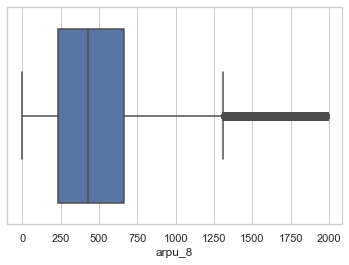

In [51]:
univariate(imputed_data.arpu_8)

count    30001.000000
mean     648.407470  
std      380.333405  
min      0.000000    
25%      409.000000  
50%      568.500000  
75%      795.500000  
max      2401.500000 
Name: total_rech_amt_good, dtype: float64


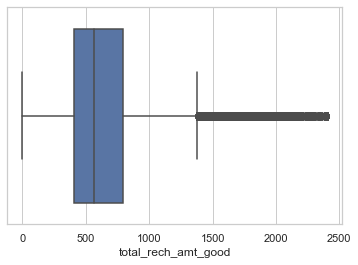

In [52]:
univariate(imputed_data.total_rech_amt_good)

count    30001.000000
mean     1.711910    
std      2.405251    
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      2.000000    
max      13.500000   
Name: total_rech_data_good, dtype: float64


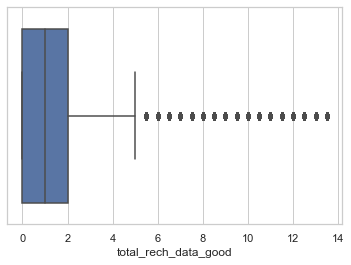

In [53]:
univariate(imputed_data.total_rech_data_good)

#### Bivariate Analysis

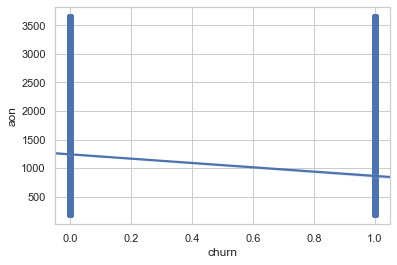

In [54]:
bivariate(imputed_data.churn, imputed_data.aon)

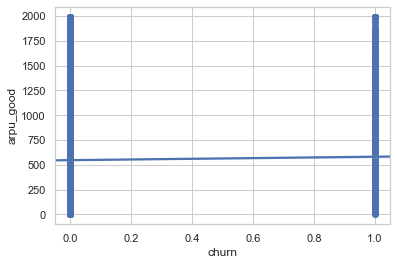

In [55]:
bivariate(imputed_data.churn, imputed_data.arpu_good)

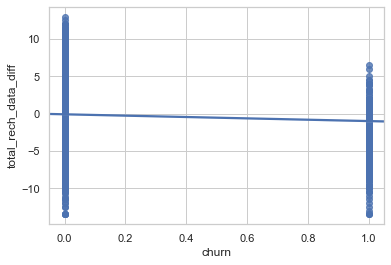

In [56]:
bivariate(imputed_data.churn, imputed_data.total_rech_data_diff)

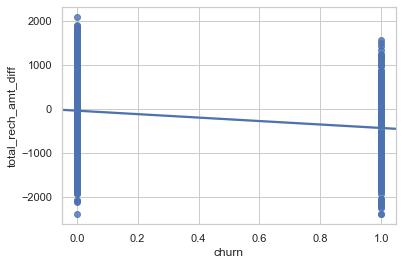

In [57]:
bivariate(imputed_data.churn, imputed_data.total_rech_amt_diff)

In [58]:
pd.crosstab(imputed_data.churn, imputed_data.night_pck_user_8, normalize='columns')*100

night_pck_user_8,0.0,1.0
churn,,
0.0,91.800405,97.360704
1.0,8.199595,2.639296


In [59]:
pd.crosstab(imputed_data.churn, imputed_data.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0
churn,,,,,
0.0,24972,1609,399,184,396
1.0,2369,48,5,8,11


### Correlation Between all Features

In [60]:
correlation_matrix = imputed_data.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.85)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  25
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('loc_og_t2m_mou_8', 'loc_og_mou_8'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_8', 'sachet_2g_8'), ('arpu_3g_8', 'arpu_2g_8'), ('arpu_2g_8', 'monthly_3g_8'), ('arpu_diff', 'total_rech_amt_diff'), ('std_og_mou_diff', 'total_og_mou_diff'), ('og_others_diff', 'og_others_good'), ('loc_ic_mou_diff', 'total_ic_mou_diff'), ('arpu_good', 'total_rech_amt_good'), ('onnet_mou_good', 'std_og_t2t_mou_good'), ('loc_og_t2m_mou_good', 'loc_og_mou_good'), ('loc_ic_t2m_mou_good', 'loc_ic_mou_good'), ('loc_ic_mou_good', 'total_ic_mou_good'), ('std_ic_t2m_mou_good', 'std_ic_mou_good'), ('total_rech_data_good', 'sachet_2g_good'), ('count_rech_2g_good', 'sachet_2g_good'), ('arpu_3g_good', 'arpu_2g_good'), ('arpu_3g_good', 'monthly_3g_good'), ('arpu_2g_good', 'monthly_3g_good')]


In [61]:
corr_matrix = imputed_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [62]:
print(to_drop)

['loc_og_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'arpu_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'total_og_mou_diff', 'total_ic_mou_diff', 'total_rech_amt_diff', 'loc_og_mou_good', 'std_og_t2t_mou_good', 'og_others_good', 'loc_ic_mou_good', 'std_ic_mou_good', 'total_ic_mou_good', 'total_rech_amt_good', 'arpu_2g_good', 'sachet_2g_good', 'monthly_3g_good']


We are droping columns which are highly co-related to each other. The above columns have more than 0.85 co-relation. So, we are dropping them all.

In [63]:
imputed_data.drop(columns=to_drop, axis=1,inplace=True)

In [64]:
imputed_data.shape

(30001, 104)

### Buliding Models

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

a) It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

b) It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [65]:
# divide data into train and test

from sklearn.model_selection import train_test_split
X = imputed_data.drop("churn", axis = 1)
y = imputed_data.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [66]:
# print shapes of train and test sets

X_train.shape

(21000, 103)

In [67]:
y_train.shape

(21000,)

In [68]:
X_test.shape

(9001, 103)

In [69]:
y_test.shape

(9001,)

### Scaling

We are using Standard Scaler from sklearn here to scale the data which standardize features by removing the mean and scaling to unit variance.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We are checking if the class is balanced.

In [72]:
y_train.value_counts()

0.0    19291
1.0    1709 
Name: churn, dtype: int64

### Class is Imbalanced 
Since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - we are checking class weight technique to handle class imbalance.

In [73]:
from sklearn.utils import class_weight
# In order to calculate the class weight do the following

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [74]:
class_weights

array([0.54429527, 6.14394383])

### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling

SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_S, y_train_S = sm.fit_sample(X_train, y_train.ravel())
X_train_S = pd.DataFrame(X_train_S, columns = X.columns)
X_train_S.shape, y_train_S.shape

((38582, 103), (38582,))

In [76]:
X_test = pd.DataFrame(X_test, columns = X.columns)

In [77]:
y_train_S = pd.DataFrame(y_train_S, columns = ['churn'])
y_train_S.churn.value_counts()

1.0    19291
0.0    19291
Name: churn, dtype: int64

###  1. Logistic Regression

Logistic regression calculates the class probabilities of all the classes present in the outcome variable, using the 
logistic function. The final class is predicted by providing a cutoff value.

In [78]:
import statsmodels.api as sm

In [79]:
# Logistic regression model
logm1 = sm.GLM(y_train_S,(sm.add_constant(X_train_S)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38496
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14285.
Date:                Tue, 14 Apr 2020   Deviance:                       28570.
Time:                        15:52:58   Pearson chi2:                 1.06e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9228      0.028    -68.634      0.000      -1.978      -1.868
arpu_8                    0.0318      0.028      1.132      0.258      -0.023       0.087
onnet_mou_8              -0.2527      0.069     -3.668      0.000      -0.388      -0.118
offnet_mou_8              0.3125      0.096      3.254      0.001       0.124       0.501
roam_ic_mou_8            -0.0233      0.016     -1.471      0.141      -0.054       0.008
roam_og_mou_8             0.1531      0.021      7.366      0.000       0.112       0.194
loc_og_t2t_mou_8          0.6539      0.143      4.578      0.000       0.374       0.934
loc_og_t2m_mou_8          0.1795      0.197      0.911      0.362      -0.207       0.566
loc_og_t2f_mou_8          0.0938      0.040      2.367      0.018       0.016       0.171
loc_og_t2c_mou_8          0.0403      0.025      1.608      0.108      -0.009       0.089
std_og_t2m_mou_8         -0.9089      0.144     -6.317      0.000      -1.191      -0.627
std_og_t2f_mou_8         -0.2237      0.037     -6.034      0.000      -0.296      -0.151
std_og_mou_8              3.1217      0.181     17.259      0.000       2.767       3.476
isd_og_mou_8              0.0607      0.014      4.256      0.000       0.033       0.089
spl_og_mou_8              0.0123      0.017      0.720      0.472      -0.021       0.046
total_og_mou_8           -6.9054      0.371    -18.633      0.000      -7.632      -6.179
loc_ic_t2t_mou_8         -0.4402      0.091     -4.838      0.000      -0.619      -0.262
loc_ic_t2m_mou_8         -1.0534      0.142     -7.429      0.000      -1.331      -0.775
loc_ic_t2f_mou_8         -0.2570      0.052     -4.943      0.000      -0.359      -0.155
std_ic_t2t_mou_8         -0.2395      0.054     -4.427      0.000      -0.346      -0.133
std_ic_t2m_mou_8         -0.1585      0.079     -2.003      0.045      -0.314      -0.003
std_ic_t2f_mou_8          0.0103      0.032      0.322      0.748      -0.052       0.073
spl_ic_mou_8             -0.3172      0.020    -16.215      0.000      -0.356      -0.279
isd_ic_mou_8             -0.0019      0.013     -0.143      0.886      -0.027       0.024
ic_others_8              -0.0346      0.014     -2.489      0.013      -0.062      -0.007
total_rech_num_8         -0.2930      0.018    -16.606      0.000      -0.328      -0.258
max_rech_amt_8           -0.0002      0.019     -0.009      0.992      -0.037       0.036
last_day_rch_amt_8       -0.6014      0.024    -24.963      0.000      -0.649      -0.554
total_rech_data_8         0.0290      0.036      0.806      0.420      -0.042       0.100
max_rech_data_8           0.2690      0.026     10.430      0.000       0.218       0.320
count_rech_2g_8          -0.3690      0.047     -7.915      0.000      -0.460      -0.278
count_rech_3g_8        

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold

logreg = LogisticRegression(random_state=101)
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_S, y_train_S)

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 52


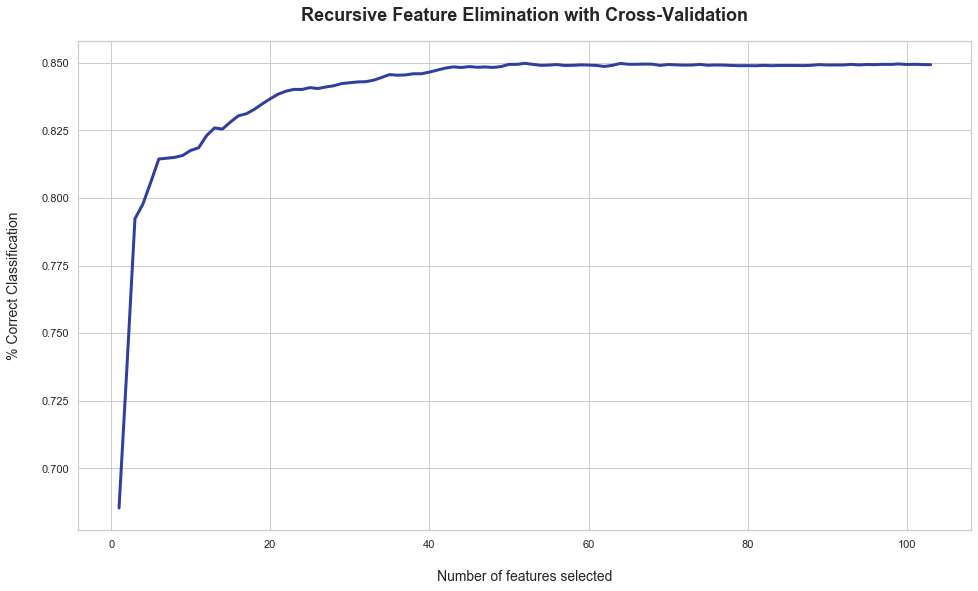

In [81]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [82]:
rfe = RFE(logreg, 20)           # running RFE with 20 variables as output which can correctly satisfy more than 80% of data
rfe = rfe.fit(X_train_S, y_train_S)
print(rfecv.support_)           # Printing the boolean results
print(rfecv.ranking_)           # Printing the ranking

[False  True  True False  True  True  True False False  True  True  True
 False False  True  True  True  True  True  True False  True False False
  True False  True False  True  True  True  True False False  True  True
 False False  True  True  True False  True  True False False  True  True
 False False False False False  True False False  True False False False
 False  True False False False  True False False  True  True False  True
 False False  True  True False  True  True  True False  True False False
  True False False  True False False False  True  True  True  True False
 False False  True False  True False  True]
[37  1  1 34  1  1  1  7 25  1  1  1 16 49  1  1  1  1  1  1 41  1 50 30
  1 52  1 13  1  1  1  1 17 48  1  1 11 32  1  1  1 28  1  1  5  4  1  1
 43 12 10 29 35  1  9 31  1 15 45 14 27  1 44  3 46  1 33 39  1  1  6  1
 22 19  1  1 26  1  1  1 51  1 36 40  1 24  8  1  2 18 47  1  1  1  1 20
 21 42  1 23  1 38  1]


In [83]:
f = rfe.get_support(1) #the most important features
col = X_train_S[X_train_S.columns[f]] # final features

In [84]:
col_test = X_test[X_test.columns[f]] # final features

In [85]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38582 entries, 0 to 38581
Data columns (total 20 columns):
onnet_mou_8            38582 non-null float64
std_og_mou_8           38582 non-null float64
total_og_mou_8         38582 non-null float64
loc_ic_t2m_mou_8       38582 non-null float64
spl_ic_mou_8           38582 non-null float64
total_rech_num_8       38582 non-null float64
last_day_rch_amt_8     38582 non-null float64
av_rech_amt_data_8     38582 non-null float64
arpu_3g_8              38582 non-null float64
fb_user_8              38582 non-null float64
aon                    38582 non-null float64
onnet_mou_diff         38582 non-null float64
loc_og_mou_diff        38582 non-null float64
std_og_mou_diff        38582 non-null float64
offnet_mou_good        38582 non-null float64
loc_og_t2t_mou_good    38582 non-null float64
loc_og_t2m_mou_good    38582 non-null float64
std_og_mou_good        38582 non-null float64
total_og_mou_good      38582 non-null float64
loc_ic_t2m_mou_go

In [86]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(col, y_train_S)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
logsk_sm = sm.GLM(y_train_S,(sm.add_constant(col)), family = sm.families.Binomial())
logsk_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15229.
Date:                Tue, 14 Apr 2020   Deviance:                       30458.
Time:                        16:07:37   Pearson chi2:                 2.68e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7501      0.026    -67.884      0.000      -1.801      -1.700
onnet_mou_8             0.9721      0.061     15.907      0.000       0.852       1.092
std_og_mou_8            2.4966      0.136     18.389      0.000       2.230       2.763
total_og_mou_8         -7.9047      0.351    -22.499      0.000      -8.593      -7.216
loc_ic_t2m_mou_8       -1.2939      0.057    -22.774      0.000      -1.405      -1.183
spl_ic_mou_8           -0.4763      0.027    -17.870      0.000      -0.529      -0.424
total_rech_num_8       -0.5214      0.023    -22.504      0.000      -0.567      -0.476
last_day_rch_amt_8     -0.5840      0.020    -28.711      0.000      -0.624      -0.544
av_rech_amt_data_8     -0.8204      0.042    -19.375      0.000      -0.903      -0.737
arpu_3g_8               0.7298      0.032     22.563      0.000       0.666       0.793
fb_user_8              -0.5199      0.025    -20.519      0.000      -0.570      -0.470
aon                    -0.4081      0.019    -21.728      0.000      -0.445      -0.371
onnet_mou_diff         -0.5517      0.042    -13.282      0.000      -0.633      -0.470
loc_og_mou_diff         1.7120      0.103     16.668      0.000       1.511       1.913
std_og_mou_diff         2.5450      0.129     19.703      0.000       2.292       2.798
offnet_mou_good         0.9838      0.061     16.257      0.000       0.865       1.102
loc_og_t2t_mou_good     0.6797      0.069      9.858      0.000       0.545       0.815
loc_og_t2m_mou_good     0.7080      0.090      7.881      0.000       0.532       0.884
std_og_mou_good         0.7719      0.097      7.956      0.000       0.582       0.962
total_og_mou_good       2.3103      0.221     10.446      0.000       1.877       2.744
loc_ic_t2m_mou_good     0.4853      0.039     12.484      0.000       0.409       0.561
=======================================================================================
"""

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

vif = pd.DataFrame()
vif['Features'] = col.columns
vif['VIF'] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,std_og_mou_diff,inf
17,std_og_mou_good,inf
1,std_og_mou_8,inf
18,total_og_mou_good,109.78
2,total_og_mou_8,100.76
14,offnet_mou_good,14.44
12,loc_og_mou_diff,12.38
0,onnet_mou_8,10.99
11,onnet_mou_diff,9.52
16,loc_og_t2m_mou_good,8.37


In [89]:
# dropping std_og_mou_diff as it is having high vif

col1 = col.drop('std_og_mou_diff', axis=1)

In [90]:
# Adding a constant variable

logsk_sm1 = sm.GLM(y_train_S,(sm.add_constant(col1)), family = sm.families.Binomial())
logsk_sm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15229.
Date:                Tue, 14 Apr 2020   Deviance:                       30458.
Time:                        16:07:41   Pearson chi2:                 2.68e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7502      0.026    -67.857      0.000      -1.801      -1.700
onnet_mou_8             0.9722      0.061     15.972      0.000       0.853       1.092
std_og_mou_8            6.2322      0.302     20.653      0.000       5.641       6.824
total_og_mou_8         -7.9051      0.352    -22.488      0.000      -8.594      -7.216
loc_ic_t2m_mou_8       -1.2939      0.057    -22.768      0.000      -1.405      -1.183
spl_ic_mou_8           -0.4763      0.027    -17.915      0.000      -0.528      -0.424
total_rech_num_8       -0.5214      0.023    -22.489      0.000      -0.567      -0.476
last_day_rch_amt_8     -0.5840      0.020    -28.739      0.000      -0.624      -0.544
av_rech_amt_data_8     -0.8204      0.042    -19.354      0.000      -0.903      -0.737
arpu_3g_8               0.7298      0.032     22.565      0.000       0.666       0.793
fb_user_8              -0.5199      0.025    -20.516      0.000      -0.570      -0.470
aon                    -0.4081      0.019    -21.731      0.000      -0.445      -0.371
onnet_mou_diff         -0.5518      0.041    -13.317      0.000      -0.633      -0.471
loc_og_mou_diff         1.7121      0.103     16.659      0.000       1.511       1.914
offnet_mou_good         0.9839      0.060     16.323      0.000       0.866       1.102
loc_og_t2t_mou_good     0.6797      0.069      9.852      0.000       0.545       0.815
loc_og_t2m_mou_good     0.7081      0.090      7.873      0.000       0.532       0.884
std_og_mou_good        -2.9189      0.203    -14.354      0.000      -3.318      -2.520
total_og_mou_good       2.3104      0.222     10.430      0.000       1.876       2.744
loc_ic_t2m_mou_good     0.4853      0.039     12.490      0.000       0.409       0.561
=======================================================================================
"""

In [91]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = col1.columns
vif['VIF'] = [variance_inflation_factor(col1.values, i) for i in range(col1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,total_og_mou_good,109.79
2,total_og_mou_8,100.76
16,std_og_mou_good,96.11
1,std_og_mou_8,68.45
13,offnet_mou_good,14.44
12,loc_og_mou_diff,12.38
0,onnet_mou_8,10.99
11,onnet_mou_diff,9.52
15,loc_og_t2m_mou_good,8.37
14,loc_og_t2t_mou_good,5.45


In [92]:
# dropping std_og_mou_diff as it is having high vif

col2 = col1.drop('total_og_mou_good', axis=1)

In [93]:
# Adding a constant variable and making new model

logsk_sm2 = sm.GLM(y_train_S,(sm.add_constant(col2)), family = sm.families.Binomial())
logsk_sm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15282.
Date:                Tue, 14 Apr 2020   Deviance:                       30564.
Time:                        16:07:44   Pearson chi2:                 3.61e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7438      0.026    -67.374      0.000      -1.795      -1.693
onnet_mou_8             1.0412      0.061     16.991      0.000       0.921       1.161
std_og_mou_8            4.4007      0.231     19.071      0.000       3.948       4.853
total_og_mou_8         -5.7601      0.267    -21.593      0.000      -6.283      -5.237
loc_ic_t2m_mou_8       -1.2725      0.057    -22.485      0.000      -1.383      -1.162
spl_ic_mou_8           -0.4683      0.026    -17.830      0.000      -0.520      -0.417
total_rech_num_8       -0.5372      0.023    -23.078      0.000      -0.583      -0.492
last_day_rch_amt_8     -0.5966      0.020    -29.454      0.000      -0.636      -0.557
av_rech_amt_data_8     -0.8285      0.043    -19.492      0.000      -0.912      -0.745
arpu_3g_8               0.7393      0.032     22.805      0.000       0.676       0.803
fb_user_8              -0.5181      0.025    -20.445      0.000      -0.568      -0.468
aon                    -0.4093      0.019    -21.869      0.000      -0.446      -0.373
onnet_mou_diff         -0.6045      0.041    -14.579      0.000      -0.686      -0.523
loc_og_mou_diff         1.0634      0.077     13.842      0.000       0.913       1.214
offnet_mou_good         1.0652      0.061     17.603      0.000       0.947       1.184
loc_og_t2t_mou_good     0.7332      0.068     10.757      0.000       0.600       0.867
loc_og_t2m_mou_good     0.7583      0.090      8.390      0.000       0.581       0.935
std_og_mou_good        -0.9480      0.077    -12.285      0.000      -1.099      -0.797
loc_ic_t2m_mou_good     0.4725      0.039     12.239      0.000       0.397       0.548
=======================================================================================
"""

In [94]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = col2.columns
vif['VIF'] = [variance_inflation_factor(col2.values, i) for i in range(col2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,56.93
1,std_og_mou_8,39.01
16,std_og_mou_good,23.22
13,offnet_mou_good,13.33
0,onnet_mou_8,10.28
11,onnet_mou_diff,8.86
15,loc_og_t2m_mou_good,7.99
12,loc_og_mou_diff,7.56
14,loc_og_t2t_mou_good,5.15
7,av_rech_amt_data_8,4.90


In [95]:
# dropping std_og_mou_diff as it is having high vif

col3 = col2.drop('total_og_mou_8', axis=1)

In [96]:
# Adding a constant variable and making new model

logsk_sm3 = sm.GLM(y_train_S,(sm.add_constant(col3)), family = sm.families.Binomial())
logsk_sm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38564
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15596.
Date:                Tue, 14 Apr 2020   Deviance:                       31192.
Time:                        16:07:47   Pearson chi2:                 2.36e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6474      0.025    -66.311      0.000      -1.696      -1.599
onnet_mou_8             0.6257      0.051     12.156      0.000       0.525       0.727
std_og_mou_8           -0.4934      0.037    -13.258      0.000      -0.566      -0.420
loc_ic_t2m_mou_8       -1.3672      0.056    -24.424      0.000      -1.477      -1.257
spl_ic_mou_8           -0.4640      0.026    -18.058      0.000      -0.514      -0.414
total_rech_num_8       -0.6274      0.023    -27.332      0.000      -0.672      -0.582
last_day_rch_amt_8     -0.6176      0.020    -30.871      0.000      -0.657      -0.578
av_rech_amt_data_8     -0.7780      0.042    -18.527      0.000      -0.860      -0.696
arpu_3g_8               0.7255      0.032     22.676      0.000       0.663       0.788
fb_user_8              -0.5857      0.025    -23.320      0.000      -0.635      -0.537
aon                    -0.3944      0.018    -21.508      0.000      -0.430      -0.358
onnet_mou_diff         -0.3495      0.036     -9.626      0.000      -0.421      -0.278
loc_og_mou_diff        -0.5409      0.030    -17.779      0.000      -0.601      -0.481
offnet_mou_good         0.6501      0.051     12.735      0.000       0.550       0.750
loc_og_t2t_mou_good    -0.5795      0.033    -17.417      0.000      -0.645      -0.514
loc_og_t2m_mou_good    -0.8931      0.043    -20.985      0.000      -0.977      -0.810
std_og_mou_good        -0.4424      0.067     -6.649      0.000      -0.573      -0.312
loc_ic_t2m_mou_good     0.5319      0.038     14.113      0.000       0.458       0.606
=======================================================================================
"""

In [97]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = col3.columns
vif['VIF'] = [variance_inflation_factor(col3.values, i) for i in range(col3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,std_og_mou_good,20.68
12,offnet_mou_good,11.65
0,onnet_mou_8,8.85
10,onnet_mou_diff,8.05
6,av_rech_amt_data_8,4.90
14,loc_og_t2m_mou_good,4.50
1,std_og_mou_8,4.04
2,loc_ic_t2m_mou_8,4.00
16,loc_ic_t2m_mou_good,3.62
13,loc_og_t2t_mou_good,2.88


In [98]:
# dropping std_og_mou_diff as it is having high vif

col4 = col3.drop('std_og_mou_good', axis=1)

In [99]:
# Adding a constant variable and making new model

logsk_sm4 = sm.GLM(y_train_S,(sm.add_constant(col4)), family = sm.families.Binomial())
logsk_sm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38565
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15618.
Date:                Tue, 14 Apr 2020   Deviance:                       31237.
Time:                        16:07:49   Pearson chi2:                 2.56e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6443      0.025    -66.187      0.000      -1.693      -1.596
onnet_mou_8             0.3578      0.032     11.312      0.000       0.296       0.420
std_og_mou_8           -0.5757      0.036    -15.994      0.000      -0.646      -0.505
loc_ic_t2m_mou_8       -1.3585      0.056    -24.307      0.000      -1.468      -1.249
spl_ic_mou_8           -0.4681      0.026    -18.150      0.000      -0.519      -0.418
total_rech_num_8       -0.6110      0.023    -26.858      0.000      -0.656      -0.566
last_day_rch_amt_8     -0.5996      0.020    -30.443      0.000      -0.638      -0.561
av_rech_amt_data_8     -0.7897      0.042    -18.823      0.000      -0.872      -0.708
arpu_3g_8               0.7358      0.032     23.035      0.000       0.673       0.798
fb_user_8              -0.5910      0.025    -23.547      0.000      -0.640      -0.542
aon                    -0.3918      0.018    -21.418      0.000      -0.428      -0.356
onnet_mou_diff         -0.1299      0.015     -8.643      0.000      -0.159      -0.100
loc_og_mou_diff        -0.5499      0.030    -18.170      0.000      -0.609      -0.491
offnet_mou_good         0.3473      0.022     15.454      0.000       0.303       0.391
loc_og_t2t_mou_good    -0.4456      0.026    -17.107      0.000      -0.497      -0.395
loc_og_t2m_mou_good    -0.7463      0.036    -20.699      0.000      -0.817      -0.676
loc_ic_t2m_mou_good     0.5083      0.037     13.622      0.000       0.435       0.581
=======================================================================================
"""

In [100]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = col4.columns
vif['VIF'] = [variance_inflation_factor(col4.values, i) for i in range(col4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,av_rech_amt_data_8,4.89
2,loc_ic_t2m_mou_8,3.99
1,std_og_mou_8,3.78
15,loc_ic_t2m_mou_good,3.59
0,onnet_mou_8,3.43
8,fb_user_8,2.85
7,arpu_3g_8,2.73
14,loc_og_t2m_mou_good,2.67
11,loc_og_mou_diff,1.99
12,offnet_mou_good,1.81


In [101]:
# Let's run the model using the selected variables

logsk2 = LogisticRegression(C=1e9)
logsk2.fit(col4, y_train_S)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
col4.shape

(38582, 16)

In [103]:
col_test1 = col_test.drop(['std_og_mou_diff', 'total_og_mou_good', 'total_og_mou_8', 'std_og_mou_good'], axis =1)

In [104]:
col_test1.shape

(9001, 16)

In [105]:
# Predicted probabilities
y_pred = logsk2.predict_proba(col_test1)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.015257
1,0.109129
2,0.392073
3,0.516693
4,0.595769


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
15721,0.0
4719,0.0
9414,0.0
29717,0.0
7841,0.0


In [107]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churn_Prob
0,0.0,0.015257
1,0.0,0.109129
2,0.0,0.392073
3,0.0,0.516693
4,0.0,0.595769


In [108]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0.0,0.015257,0
1,0.0,0.109129,0
2,0.0,0.392073,0
3,0.0,0.516693,1
4,0.0,0.595769,1


In [109]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6692, 1577],
       [ 135,  597]], dtype=int64)

In [110]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8097989112320854

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

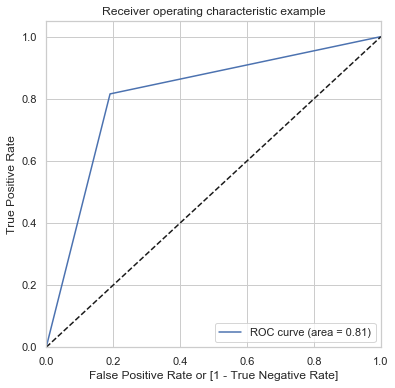

(array([0.       , 0.1907123, 1.       ]),
 array([0.        , 0.81557377, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [112]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [113]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.88'

In [114]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_final.predicted))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      8269
         1.0       0.27      0.82      0.41       732

    accuracy                           0.81      9001
   macro avg       0.63      0.81      0.65      9001
weighted avg       0.92      0.81      0.85      9001



### 2. PCA (Principal Component Analysis)

PCA is one of the most commonly used dimensionality reduction techniques in the industry.
By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, 
visualising complex data sets, and in many more areas.

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [116]:
pca.explained_variance_ratio_

array([1.05406675e-01, 8.61119541e-02, 5.92125868e-02, 4.82823365e-02,
       3.98869798e-02, 3.24002086e-02, 2.99767507e-02, 2.77210984e-02,
       2.63019527e-02, 2.52331604e-02, 2.45715932e-02, 2.29052516e-02,
       2.11218950e-02, 1.94489104e-02, 1.83975890e-02, 1.72299622e-02,
       1.68452820e-02, 1.62097144e-02, 1.57214296e-02, 1.53228846e-02,
       1.49051782e-02, 1.42414528e-02, 1.41628452e-02, 1.38721132e-02,
       1.34553233e-02, 1.26987936e-02, 1.23144798e-02, 1.17485343e-02,
       1.11707687e-02, 1.08222167e-02, 1.03314561e-02, 1.02017832e-02,
       9.81973002e-03, 9.54513394e-03, 9.09177485e-03, 8.54438719e-03,
       8.38661401e-03, 8.06154974e-03, 7.62636615e-03, 7.46848556e-03,
       7.07375484e-03, 6.76308935e-03, 6.29442341e-03, 6.02401259e-03,
       5.59554471e-03, 5.32691925e-03, 5.25869361e-03, 4.91001711e-03,
       4.79395650e-03, 4.58053705e-03, 4.38765741e-03, 3.89318628e-03,
       3.83049354e-03, 3.53035904e-03, 3.39050637e-03, 3.35169848e-03,
      

In [117]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

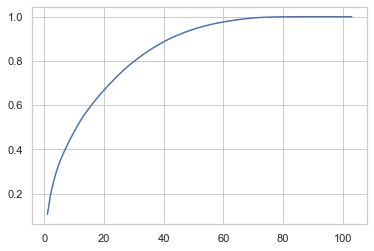

In [118]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### PCA with SMOTE

In [119]:
pca_S = PCA(random_state=42)
pca_S.fit(X_train_S)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [120]:
var_cumu_s = np.cumsum(pca_S.explained_variance_ratio_)

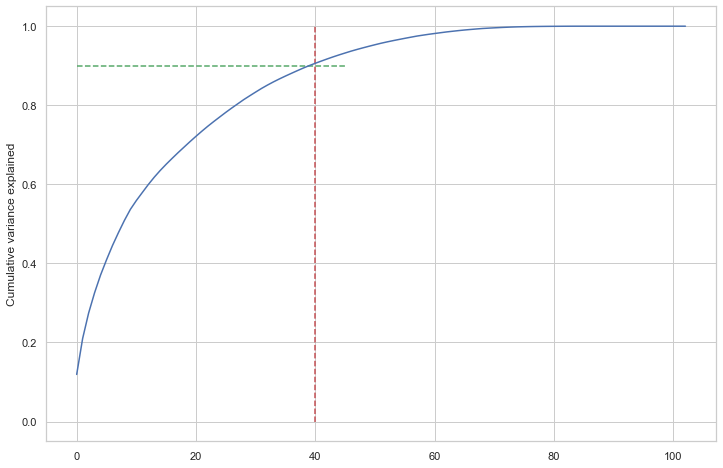

In [121]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=45, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu_s)
plt.ylabel("Cumulative variance explained")
plt.show()

We see that there is not much difference in PCA with or without PCA. We are taking n_components as 40 for explaining variance at 0.90

In [122]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [123]:
df_train_pca = pca_final.fit_transform(X_train_S)

In [124]:
df_train_pca.shape

(38582, 40)

In [125]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [126]:
corrmat.shape

(40, 40)

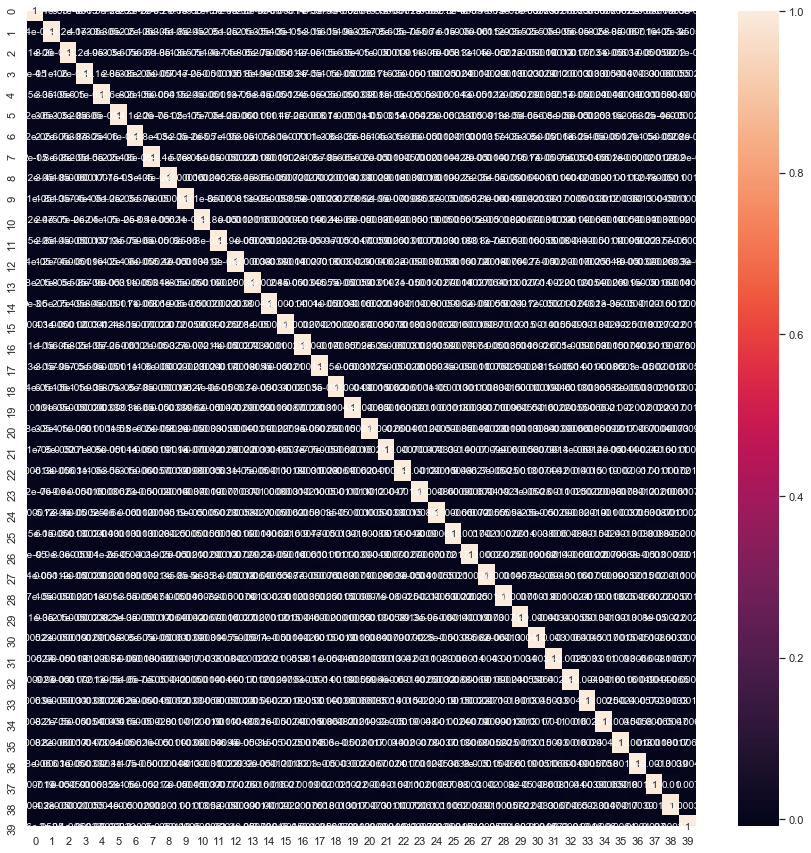

In [127]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [128]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 40)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
learner_pca = LogisticRegression()

In [131]:
model_pca = learner_pca.fit(df_train_pca, y_train_S)

In [132]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [133]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.011505
1,0.095088
2,0.305906
3,0.561531
4,0.548821


In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churn_Prob
0,0.0,0.011505
1,0.0,0.095088
2,0.0,0.305906
3,0.0,0.561531
4,0.0,0.548821


In [136]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0.0,0.011505,0
1,0.0,0.095088,0
2,0.0,0.305906,0
3,0.0,0.561531,1
4,0.0,0.548821,1


In [137]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6659, 1610],
       [ 119,  613]], dtype=int64)

In [138]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8079102321964227

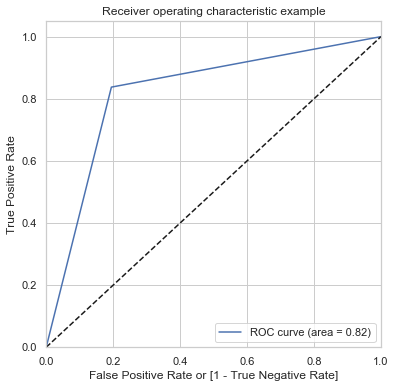

(array([0.        , 0.19470311, 1.        ]),
 array([0.        , 0.83743169, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [139]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [140]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.89'

In [141]:
# Evaluation Matrix

print(classification_report(y_pred_final.churn, y_pred_final.predicted))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      8269
         1.0       0.28      0.84      0.41       732

    accuracy                           0.81      9001
   macro avg       0.63      0.82      0.65      9001
weighted avg       0.92      0.81      0.85      9001



### 3. Non-Linear SVM

##### Hyperparameter Tuning

In [142]:
# Grid Search to Find Optimal Hyperparameters
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train_S)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 158.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [143]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,67.876209,2.662189,9.518282,0.281964,1,0.01,"{'C': 1, 'gamma': 0.01}",0.901127,0.903849,0.899171,0.898134,0.900985,0.900653,0.001954,5,0.908991,0.908343,0.911002,0.910225,0.908994,0.909511,0.000963
1,74.853842,1.303705,11.171938,0.304219,1,0.001,"{'C': 1, 'gamma': 0.001}",0.845665,0.846313,0.845257,0.843701,0.848237,0.845835,0.001478,10,0.848340,0.846331,0.847632,0.847632,0.847405,0.847468,0.000650
2,88.703611,2.727062,13.142443,0.570036,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.830504,0.831800,0.831260,0.831130,0.834759,0.831891,0.001492,12,0.833047,0.831978,0.832372,0.832664,0.831497,0.832312,0.000537
3,103.665488,8.330128,7.204409,0.275170,10,0.01,"{'C': 10, 'gamma': 0.01}",0.933783,0.936633,0.933644,0.934552,0.937403,0.935203,0.001533,3,0.952827,0.951790,0.953314,0.951824,0.952278,0.952407,0.000589
4,72.651203,3.101976,10.306568,0.585209,10,0.001,"{'C': 10, 'gamma': 0.001}",0.867306,0.865233,0.867159,0.867937,0.865863,0.866700,0.000996,7,0.871991,0.870306,0.871056,0.871218,0.871412,0.871196,0.000546
5,69.976167,2.166481,10.353035,0.568771,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.835817,0.839705,0.835925,0.836703,0.841369,0.837904,0.002234,11,0.839041,0.837713,0.839208,0.838852,0.838528,0.838668,0.000529
6,174.102316,11.037694,4.658858,0.141060,100,0.01,"{'C': 100, 'gamma': 0.01}",0.955812,0.957108,0.953473,0.955806,0.957361,0.955912,0.001378,2,0.981370,0.981338,0.981274,0.981209,0.981241,0.981287,0.000060
7,110.054511,1.958416,8.699427,0.153739,100,0.001,"{'C': 100, 'gamma': 0.001}",0.887651,0.889465,0.887247,0.886210,0.888154,0.887746,0.001071,6,0.897262,0.896387,0.898076,0.899793,0.896812,0.897666,0.001201
8,74.725352,1.036821,10.709831,0.141031,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.846702,0.846054,0.847589,0.846682,0.848626,0.847131,0.000893,9,0.849765,0.847497,0.849252,0.850159,0.849381,0.849211,0.000914
9,313.417524,7.460601,3.054337,0.752772,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.960866,0.960866,0.957750,0.960213,0.958528,0.959644,0.001276,1,0.995302,0.995302,0.995659,0.995561,0.995723,0.995510,0.000177


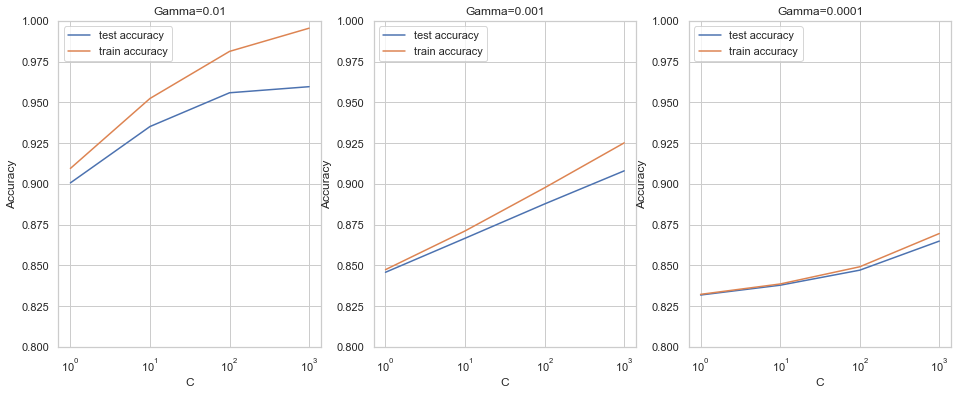

In [144]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [145]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9596443304499038 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [146]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(df_train_pca, y_train_S)
y_pred = model.predict(df_test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[7710  559]
 [ 399  333]] 

accuracy 0.8935673814020665
precision 0.37331838565022424
sensitivity/recall 0.45491803278688525


#### Random Forest

In [147]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [148]:
# fit
rfc.fit(df_train_pca, y_train_S)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [150]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      8269
         1.0       0.47      0.57      0.51       732

    accuracy                           0.91      9001
   macro avg       0.71      0.76      0.73      9001
weighted avg       0.92      0.91      0.92      9001



In [151]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7791  478]
 [ 315  417]]


In [152]:
print(accuracy_score(y_test,predictions))

0.911898677924675


In [153]:
# max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train_S)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [154]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.331295,0.103447,0.046933,0.001009,2,{'max_depth': 2},0.793443,0.795387,0.811560,0.813893,0.802100,0.803277,0.008266,4,0.808683,0.798218,0.810957,0.806972,0.804737,0.805913,0.004355
1,9.368878,0.048562,0.069817,0.001084,7,{'max_depth': 7},0.848257,0.853311,0.858476,0.858346,0.850441,0.853766,0.004118,3,0.871699,0.867066,0.863863,0.862373,0.866973,0.866395,0.003210
2,13.854179,0.089518,0.108989,0.014860,12,{'max_depth': 12},0.917973,0.917325,0.921462,0.919907,0.915889,0.918511,0.001961,2,0.954706,0.952892,0.952440,0.951046,0.952926,0.952802,0.001171
3,16.445857,0.161983,0.126170,0.008081,17,{'max_depth': 17},0.944797,0.943113,0.942587,0.945179,0.941809,0.943497,0.001292,1,0.982537,0.981759,0.982829,0.982149,0.982959,0.982446,0.000442


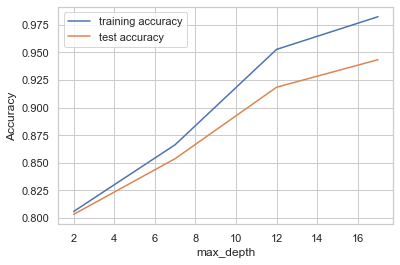

In [155]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [156]:
# n_estimators
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 100, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train_S)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [157]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.209662,0.047584,0.040957,0.001345,50,{'n_estimators': 50},0.855773,0.866528,0.871177,0.874806,0.863401,0.866337,0.006564,1,0.887348,0.883071,0.883496,0.883464,0.88327,0.88413,0.001616


In [158]:
# max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10, 20, 25, 50]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train_S)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [159]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.049191,0.403791,0.082861,0.008605,10,{'max_features': 10},0.860956,0.867695,0.871306,0.877527,0.870010,0.869499,0.005371,3,0.888644,0.884465,0.885635,0.887222,0.888453,0.886884,0.001618
1,33.331442,0.726749,0.079076,0.001697,20,{'max_features': 20},0.868083,0.874563,0.880119,0.878175,0.872473,0.874683,0.004247,2,0.898720,0.893439,0.891272,0.893410,0.894544,0.894277,0.002462
2,43.910506,2.992161,0.088158,0.019776,25,{'max_features': 25},0.865881,0.877414,0.881934,0.879990,0.872602,0.875564,0.005764,1,0.897003,0.895740,0.895548,0.895484,0.894577,0.895670,0.000778
3,0.058880,0.006743,0.000000,0.000000,50,{'max_features': 50},NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


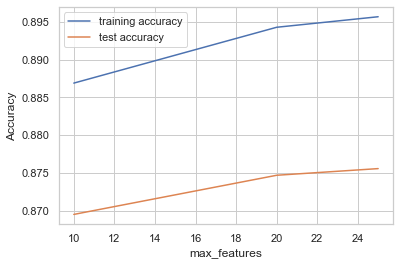

In [160]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [161]:
# min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train_S)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.364927,0.232991,0.092963,0.001545,100,{'min_samples_leaf': 100},0.839964,0.855643,0.860290,0.861198,0.851089,0.853637,0.007732,1,0.866775,0.866515,0.861984,0.864770,0.864835,0.864976,0.001710
1,11.624275,0.307603,0.087499,0.001652,150,{'min_samples_leaf': 150},0.835299,0.845795,0.853940,0.853033,0.845257,0.846665,0.006714,2,0.856245,0.855694,0.853593,0.852589,0.854565,0.854537,0.001337
2,10.712621,0.123107,0.081663,0.000655,200,{'min_samples_leaf': 200},0.831930,0.843462,0.849663,0.851089,0.839295,0.843088,0.007018,3,0.851417,0.848048,0.847211,0.847308,0.848474,0.848492,0.001536
3,10.980474,0.323581,0.086190,0.007283,250,{'min_samples_leaf': 250},0.826098,0.838279,0.844090,0.847201,0.835277,0.838189,0.007358,4,0.848566,0.842346,0.841865,0.842675,0.846563,0.844403,0.002671
4,10.622346,0.242317,0.082481,0.004402,300,{'min_samples_leaf': 300},0.824154,0.838668,0.841109,0.845257,0.830353,0.835908,0.007630,5,0.843706,0.841147,0.839467,0.840796,0.841184,0.841260,0.001374


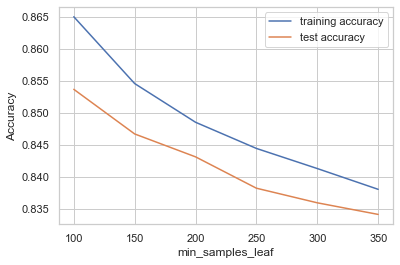

In [163]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [164]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train_S)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.377773,0.276307,0.108544,0.001086,200,{'min_samples_split': 200},0.855125,0.868731,0.878953,0.877786,0.869881,0.870095,0.008528,1,0.891430,0.889065,0.889425,0.889944,0.888518,0.889677,0.000993
1,17.653548,0.696050,0.124169,0.040649,250,{'min_samples_split': 250},0.848257,0.865362,0.871566,0.872343,0.866900,0.864886,0.008730,2,0.885242,0.880933,0.880030,0.880775,0.880840,0.881564,0.001867
2,17.193686,0.596615,0.112869,0.017187,300,{'min_samples_split': 300},0.842944,0.857717,0.865993,0.867159,0.856273,0.858017,0.008689,3,0.877855,0.874615,0.874425,0.873874,0.872546,0.874663,0.001752
3,16.191813,0.313269,0.106389,0.014395,350,{'min_samples_split': 350},0.839834,0.858235,0.859642,0.863790,0.856661,0.855633,0.008247,4,0.871667,0.869367,0.866455,0.868043,0.869889,0.869084,0.001755
4,18.437641,1.261206,0.108586,0.007611,400,{'min_samples_split': 400},0.838797,0.852663,0.857698,0.861975,0.849533,0.852133,0.007908,5,0.868200,0.865382,0.861919,0.864446,0.864511,0.864892,0.002018


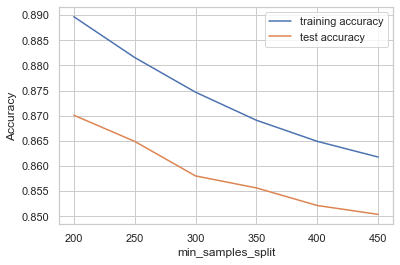

In [166]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [167]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 12, 15],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'max_features': [15, 25, 30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(df_train_pca, y_train_S)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 81.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [168]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8693432800181258 using {'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [169]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=25,
                             n_estimators=200)

In [170]:
# fit
rfc.fit(df_train_pca, y_train_S)
# df_train_pca, y_train_S

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
# predict
predictions = rfc.predict(df_test_pca)

In [172]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      8269
         1.0       0.37      0.74      0.49       732

    accuracy                           0.87      9001
   macro avg       0.67      0.81      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [173]:
print(confusion_matrix(y_test,predictions))

[[7334  935]
 [ 191  541]]


6	av_rech_amt_data_8	4.89
2	loc_ic_t2m_mou_8	3.99
1	std_og_mou_8	3.78
15	loc_ic_t2m_mou_good	3.59
0	onnet_mou_8	3.43
8	fb_user_8	2.85
7	arpu_3g_8	2.73
14	loc_og_t2m_mou_good	2.67
11	loc_og_mou_diff	1.99
12	offnet_mou_good	1.81
13	loc_og_t2t_mou_good	1.76
4	total_rech_num_8	1.69
5	last_day_rch_amt_8	1.47
10	onnet_mou_diff	1.37
9	aon	1.22
3	spl_ic_mou_8	1.04

### Summary & Predictions

We used **PCA** for **dimensionality reduction** and **multi-collinearity** removal. After obtaining eigen vectors **(n_components=40)** , we then used this for churn 
prediction using 
<br>
**Random Fprest** which is 87% accurate
<br>
**Non-linear SVM** which is 89% accurate
<br>
**Logistic Regression** which is 81% accurate

We also ran a **logistic regression model without PCA** so that we can find out the features which are important. 
The accuracy of ths model is  80%.

#### important features derived from logistic regression without PCA

av_rech_amt_data_8	
loc_ic_t2m_mou_8	
std_og_mou_8	
loc_ic_t2m_mou_good	
onnet_mou_8	
fb_user_8	
arpu_3g_8	
loc_og_t2m_mou_good	
loc_og_mou_diff	
offnet_mou_good	
loc_og_t2t_mou_good
<br>
total_rech_num_8	
last_day_rch_amt_8	
onnet_mou_diff	
aon	
spl_ic_mou_8

#### Business Insights

1. From the above we can clearly infer that **calls related incoming & outgoing within a circle** is key for identifying churn customers.
2. Especially the **minutes of usage** during the action pahse when compared to good month (7th month) has reduced.
3. The other key factor is if the **recharge amount** shows a dip in the action phase is sign of churn.
4. **Age on network** is also a key indicator for identifying the churn, if aon is less than 500 days and their usage is reduce then the customer is going to be churned.
5. The usage of mobile data has also reduced when compared with 7th month. So, **data usage & amount** can also be the other features for understanding the churn behavior.